In [1]:
#Input Data

# Engine Parameters

In [2]:
Vs = 0.0028 # Swept Volume (m^3)
nm = 80 # Mechanical efficiency (%)
ni = 74 # Isentropic iefficiency (%)
Cp = 1.005 # Specific heat capacity (J/kgK)

# Super charger

In [3]:
p1 = 1.013 # Atmospheric Pressure (bar)
T1 = 288 #Atmospheric temperature (K)
pr = 1.6 # Pressure Ratio
g = 1.4 #Adiabatic gas constant
R = 287 # Real gas constant(J/kgK)


# Case 1 : (At a constant enginer speed)

In [4]:
N=4000 # Engine Speed(rpm)
ip=12.5 # Average indicated power (Kw/m^3)
nv = 85 #Volumetric efficiency(%)

In [5]:
#Superrcharger pressure output
p2 = pr*p1 #(bar)
#Engine temperature output
T21 = T1*(p2/p1)**((g-1)/g)
#supercharger temp outputt
T2 = T1+((T21-T1)/(ni/100))
#Piston swept volume
Vs1 = (Vs*(N/2))
#Equivalent volume
Ve = (Vs1*p2*T1)/(T2*p1)
#Volumetric efficiency of supercharger
nv1 = (Ve/Vs1)*100

In [6]:
#Unsupercharged induced volume
Vi = Vs1*(nv/100)
#increment in the induced volume
Vii = Ve - Vi
#Increment in the indicated power due to vol of air
ipa = ip*Vii
#Increment in the indicated power due to pressure of the air
ipi = ((p2-p1)*10**5*Vs1)/(60*1000)
#Total increment in the induced power
ipt = ipi + ipa 

In [7]:
#Increment in the brake power of the engine
bp = ipt*(nv/100)
#Brake power without supercharger
bpe = ip*(nm/100)
#Mass of air delivered to supercharger
ma = (p2*(Vs1/60)*10**5)/(R*T2)
#Power consumed by the supercharger
P=ma*Cp*(T2-T1)
#Power delivered to the supercharger to run
Pd = P/(nm/100)
#net increment in the brake power 
bpn = bp - Pd

# results

In [8]:
print("Engine's Indicated power without supercharger", ip,'Kw')
print("Engine's Indicated power with supercharger", round(ipt),'Kw')
print("Engine's Brake Power without the supercharger is ", round(bpe),'Kw')
print("Engine's Brake Power with the supercharger is ", round(bpn),'Kw')
print("volumetric efficiency of the engine with the supercharger is ", round(nv1),'%')

Engine's Indicated power without supercharger 12.5 Kw
Engine's Indicated power with supercharger 40 Kw
Engine's Brake Power without the supercharger is  10 Kw
Engine's Brake Power with the supercharger is  23 Kw
volumetric efficiency of the engine with the supercharger is  134 %


# Case 2 : engine speed is varying

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv("Engine-210128-103439.csv")
data.head() # if number of rows is not given , it will give 5 rows

,Speed (rpm),Volumetric Efficiency (%),Indicated Power (Kw)
0,1000,70,10
1,2000,76,13
2,3000,80,16
3,4000,82,20
4,5000,85,21


In [11]:
data.head(n=15)

,Speed (rpm),Volumetric Efficiency (%),Indicated Power (Kw)
0,1000,70,10
1,2000,76,13
2,3000,80,16
3,4000,82,20
4,5000,85,21
5,6000,86,22
6,7000,88,24
7,8000,90,26
8,9000,91,28
9,10000,93,30


In [12]:
#Superrcharger pressure output
p2 = pr*p1 #(bar)
#Engine temperature output
T21 = T1*(p2/p1)**((g-1)/g)
#supercharger temp outputt
T2 = T1+((T21-T1)/(ni/100))
#Piston swept volume
Vs1 = (Vs*(data['Speed (rpm)']/2))
#Equivalent volume
Ve = (Vs1*p2*T1)/(T2*p1)
#Volumetric efficiency of supercharger
nv1 = (Ve/Vs1)*100
print(Vs1)

0     1.4
1     2.8
2     4.2
3     5.6
4     7.0
5     8.4
6     9.8
7    11.2
8    12.6
9    14.0
Name: Speed (rpm), dtype: float64


In [13]:
#Unsupercharged induced volume
Vi = Vs1*(data['Volumetric Efficiency (%)']/100)
#increment in the induced volume
Vii = Ve - Vi
#Increment in the indicated power due to vol of air
ipa = data['Indicated Power (Kw)']*Vii
#Increment in the indicated power due to pressure of the air
ipi = ((p2-p1)*10**5*Vs1)/(60*1000)
#Total increment in the induced power
data['Total Indicated Power(Kw)'] = ipi + ipa 
data.head()

,Speed (rpm),Volumetric Efficiency (%),Indicated Power (Kw),Total Indicated Power(Kw)
0,1000,70,10,10.375257
1,2000,76,13,23.940748
2,3000,80,16,40.528472
3,4000,82,20,63.889254
4,5000,85,21,79.090096


In [18]:
#Increment in the brake power of the engine
bp = data['Total Indicated Power(Kw)']*(nm/100)
#Brake power without supercharger
data['Brake power without supercharger (Kw)'] = data['Indicated Power (Kw)']*(nm/100)
#Mass of air delivered to supercharger
ma = (p2*(Vs1/60)*10**5)/(R*T2)
#Power consumed by the supercharger
P=ma*Cp*(T2-T1)
#Power delivered to the supercharger to run
Pd = P/(nm/100)
#net increment in the brake power 
data['Net Increment in the brake power (Kw)'] = bp - Pd

In [22]:
#Viewing teh data
data.head(10)

,Speed (rpm),Volumetric Efficiency (%),Indicated Power (Kw),Total Indicated Power(Kw),Brake power without supercharger (Kw),Net Increment in the brake power (Kw)
0,1000,70,10,10.375257,8.0,5.608021
1,2000,76,13,23.940748,10.4,13.768230
2,3000,80,16,40.528472,12.8,24.346225
3,4000,82,20,63.889254,16.0,40.342666
4,5000,85,21,79.090096,16.8,49.811156
5,6000,86,22,97.174349,17.6,61.586374
6,7000,88,24,118.069953,19.2,75.610673
7,8000,90,26,139.412381,20.8,89.992430
8,9000,91,28,164.393630,22.4,107.285246
9,10000,93,30,186.293703,24.0,122.113120


# Plotting
Indicated Power and Brake Power with respect to your Engine's speed

In [20]:
import matplotlib.pyplot as plt

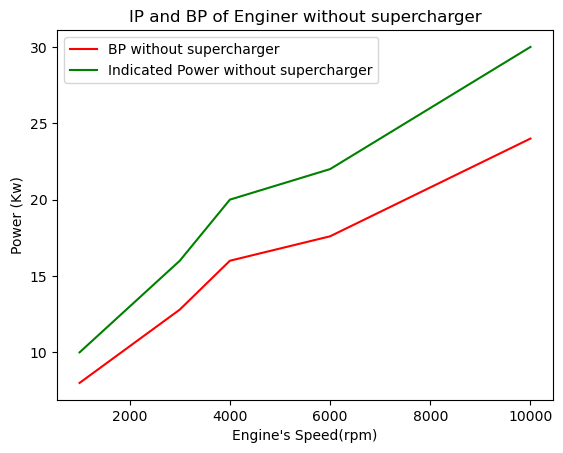

In [31]:
plt.plot(data['Speed (rpm)'], data['Brake power without supercharger (Kw)'],'r',label='BP without supercharger')
plt.plot(data['Speed (rpm)'], data['Indicated Power (Kw)'],'g',label='Indicated Power without supercharger')
plt.title("IP and BP of Enginer without supercharger")
plt.xlabel("Engine's Speed(rpm)")
plt.ylabel("Power (Kw)")
plt.legend(loc='best') #Location is upperleft
plt.show()

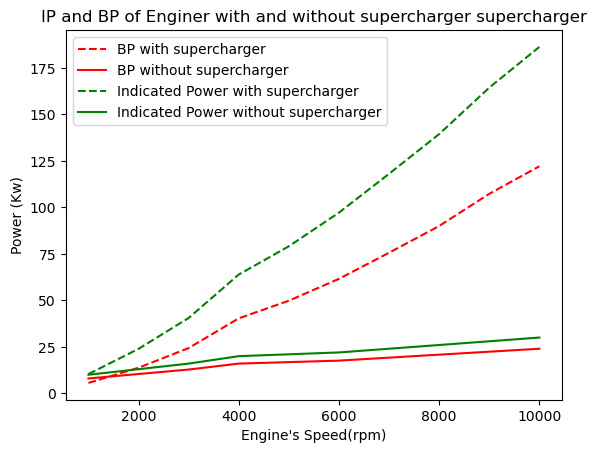

In [36]:
plt.plot(data['Speed (rpm)'], data['Net Increment in the brake power (Kw)'],'--r',label='BP with supercharger')
plt.plot(data['Speed (rpm)'], data['Brake power without supercharger (Kw)'],'r',label='BP without supercharger')
plt.plot(data['Speed (rpm)'], data['Total Indicated Power(Kw)'],'--g',label='Indicated Power with supercharger')
plt.plot(data['Speed (rpm)'], data['Indicated Power (Kw)'],'g',label='Indicated Power without supercharger')
plt.title("IP and BP of Enginer with and without supercharger supercharger")
plt.xlabel("Engine's Speed(rpm)")
plt.ylabel("Power (Kw)")
plt.legend(loc='best') #Location is upperleft
plt.show()
